In [1]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [2]:
import pandas as pd
import numpy as np
data=pd.DataFrame(digits.data)

In [3]:
from sklearn import neighbors

In [19]:
model_params = { 
    'knn': {
        'model':neighbors.KNeighborsClassifier(),
        'params': {
            'n_neighbors':[3,5,10]
        }
    }
}

In [20]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'],
                       cv=5, return_train_score=False)
    clf.fit(data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,knn,0.966622,{'n_neighbors': 3}


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,digits.target,test_size=0.3)

In [22]:
knn=neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.score(X_test,y_test)

0.9814814814814815

In [24]:
y_pred=knn.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  1, 49]], dtype=int64)

Text(95.72222222222221, 0.5, 'True')

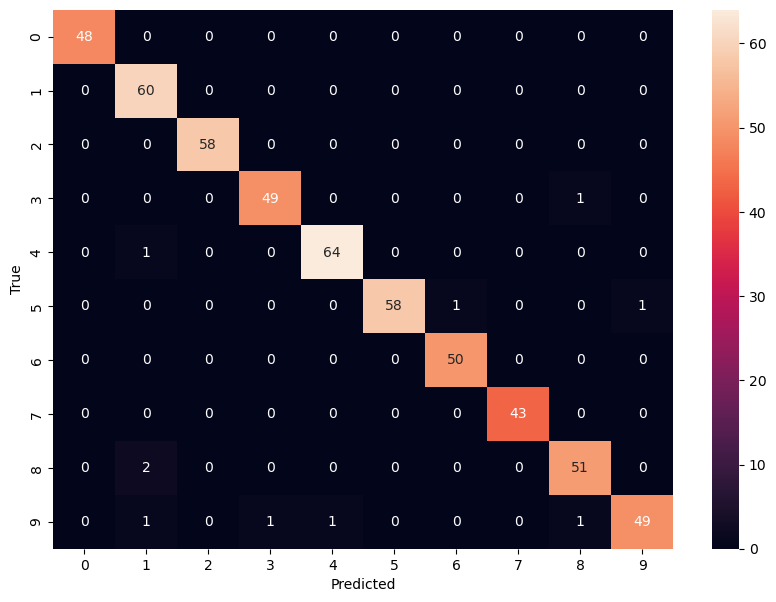

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.94      1.00      0.97        60
           2       1.00      1.00      1.00        58
           3       0.98      0.98      0.98        50
           4       0.98      0.98      0.98        65
           5       1.00      0.97      0.98        60
           6       0.98      1.00      0.99        50
           7       1.00      1.00      1.00        43
           8       0.96      0.96      0.96        53
           9       0.98      0.92      0.95        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

